In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
lr_report = pd.read_csv('../data/lr_class_report.csv')
sr_report = pd.read_csv('../data/sr_class_report.csv')

In [58]:
lr_report = lr_report.sort_values('f1-score', ascending=False).head(10)
lr_report = lr_report.sort_values('f1-score', ascending=True)

In [59]:
lr_report

,type,precision,recall,f1-score,support
6,9: mls,0.79,0.86,0.82,257
14,20: tetracycline,0.75,0.91,0.82,44
7,10: multidrug,0.84,0.84,0.84,122
10,14: polymyxin,0.85,0.85,0.85,211
12,17: rifampin,0.80,1.00,0.89,8
1,1: bacitracin,0.91,0.90,0.91,647
15,21: trimethoprim,1.00,0.83,0.91,6
2,2: beta_lactam,0.93,0.92,0.92,897
11,16: quinolone,1.00,0.86,0.92,14
8,12: non_resistant,0.89,1.00,0.94,72


In [60]:
sr_report = sr_report.sort_values('f1-score', ascending=False).head(10)
sr_report = sr_report.sort_values('f1-score', ascending=True)

In [61]:
sr_report

,type,precision,recall,f1-score,support
5,6: glycopeptide,0.53,0.44,0.43,10
8,9: mupirocin,0.50,0.41,0.44,7
7,8: multidrug,0.56,0.47,0.51,162
3,3: chloramphenicol,0.68,0.59,0.63,218
0,0: aminoglycoside,0.65,0.63,0.64,373
4,4: fosfomycin,0.80,0.57,0.66,111
6,7: mls,0.77,0.82,0.79,1307
9,10: polymyxin,0.79,0.83,0.81,1107
2,2: beta_lactam,0.86,0.87,0.86,3105
1,1: bacitracin,0.89,0.88,0.88,3194


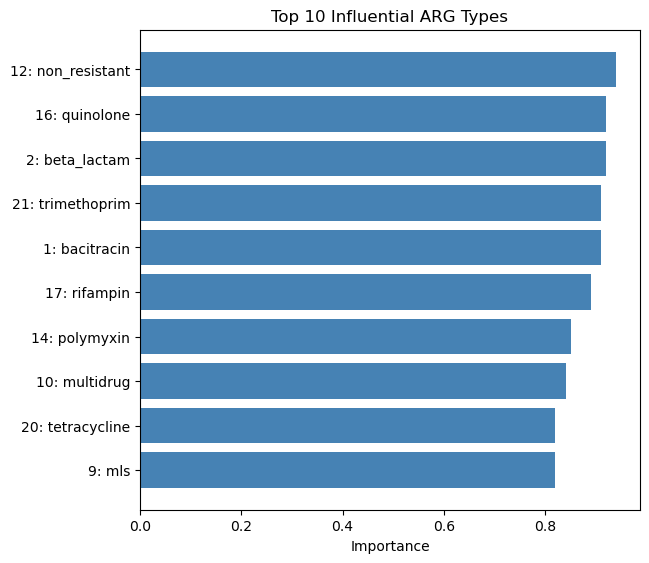

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(np.arange(len(lr_report['type'])), lr_report['f1-score'], color='steelblue')

ax.set_yticks(np.arange(len(lr_report['type'])))
ax.set_yticklabels(lr_report['type'])
ax.set_xlabel('Importance')
ax.set_title('Top 10 Influential ARG Types')

plt.subplots_adjust(left=0.4, right=0.9, top=0.9, bottom=0.1)


plt.show()

In [63]:
sr_report

,type,precision,recall,f1-score,support
5,6: glycopeptide,0.53,0.44,0.43,10
8,9: mupirocin,0.50,0.41,0.44,7
7,8: multidrug,0.56,0.47,0.51,162
3,3: chloramphenicol,0.68,0.59,0.63,218
0,0: aminoglycoside,0.65,0.63,0.64,373
4,4: fosfomycin,0.80,0.57,0.66,111
6,7: mls,0.77,0.82,0.79,1307
9,10: polymyxin,0.79,0.83,0.81,1107
2,2: beta_lactam,0.86,0.87,0.86,3105
1,1: bacitracin,0.89,0.88,0.88,3194


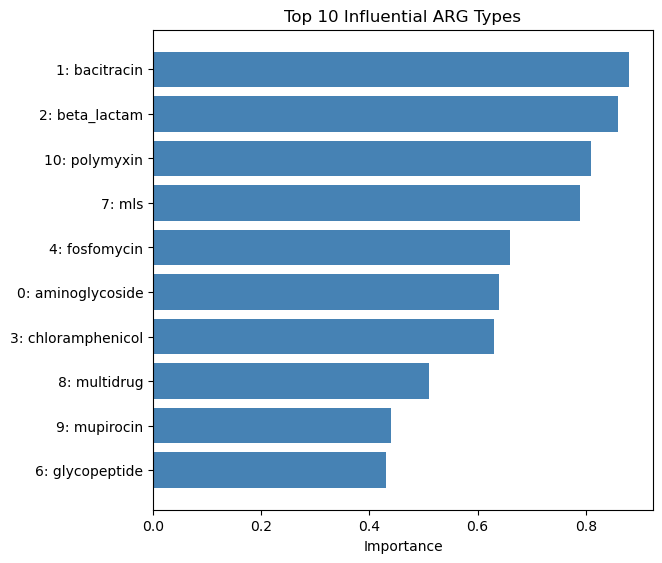

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(np.arange(len(sr_report['type'])), sr_report['f1-score'], color='steelblue')

ax.set_yticks(np.arange(len(sr_report['type'])))
ax.set_yticklabels(sr_report['type'])
ax.set_xlabel('Importance')
ax.set_title('Top 10 Influential ARG Types')

plt.subplots_adjust(left=0.4, right=0.9, top=0.9, bottom=0.1)


plt.show()

## PCA

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [13]:
ds_arg = pd.read_csv('/Users/vedantmahangade/Projects/old/compbio_project/data/long_read_arg_dataset.csv')
type_counts = ds_arg['type'].value_counts()
ds_arg = ds_arg[ds_arg['type'].isin(type_counts[type_counts > 1].index)]
# Create label encoder for drug resistance types
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(ds_arg['type'])

In [14]:
class_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print(class_mapping)

{0: 'aminoglycoside', 1: 'bacitracin', 2: 'beta_lactam', 3: 'chloramphenicol', 4: 'fosfomycin', 5: 'fosmidomycin', 6: 'fusidic_acid', 7: 'glycopeptide', 8: 'kasugamycin', 9: 'macrolide-lincosamide-streptogramin', 10: 'multidrug', 11: 'mupirocin', 12: 'non_resistant', 13: 'peptide', 14: 'polymyxin', 15: 'qa_compound', 16: 'quinolone', 17: 'rifampin', 18: 'sulfonamide', 19: 'tetracenomycin', 20: 'tetracycline', 21: 'trimethoprim', 22: 'tunicamycin'}


In [18]:
# Split data
sequences = ds_arg['dna_seq'].values


dataset = pd.DataFrame({
    'sequence': sequences,
    'label': labels
})
print(dataset)
train_sequences, test_sequences, train_labels, test_labels = train_test_split(dataset['sequence'], dataset['label'], test_size=0.08, random_state=42)

                                                sequence  label
0      GTGAAACATAAAAATCAGGCGACGCATAAAGAGTTCTCTCAACTTG...      2
1      ATGAATTGGTGGGAGCTGTTTGTTGCTTTAATTCTTGGTCTAGTGG...      1
2      ATGGGAATTGATTTTTTATTCATACTTAAGGCCTTAATAATCGCAG...      1
3      TCACTTTAGGGCATTAAGAGCGACCTTGGCAGCCTGCGCAATTAGC...      2
4      ATGAATGCAATTATGTTAGTTATCATTCTTGCACTAGTTGAAGGTA...      3
...                                                  ...    ...
13354  TAACGAATTTATGATGGAATTCCATCATCGACATAGTGCTTGTCAA...     12
13355  TAACGAATTTATGATGGAATTCCATCATCGACATAGTGCTTGTCAA...     12
13356  ATCGAATTGATGATGGAATTCCATCATCAATAAATTGCTTGTCAAA...     12
13357  ATCGAATTGATGATGGAATTCCATCATCAATAAATTGCTTGTCAAA...     12
13358  ATCGAATTGATGATGGAATTCCATCATCAATAAATTGCTTGTCAAA...     12

[13359 rows x 2 columns]


In [ ]:
with open('../data/embeddings.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
# Dimensionality reduction with PCA
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(data)

In [7]:
reduced_embeddings.shape

(2506, 3)

ValueError: 'c' argument has 1069 elements, which is inconsistent with 'x' and 'y' with size 2506.

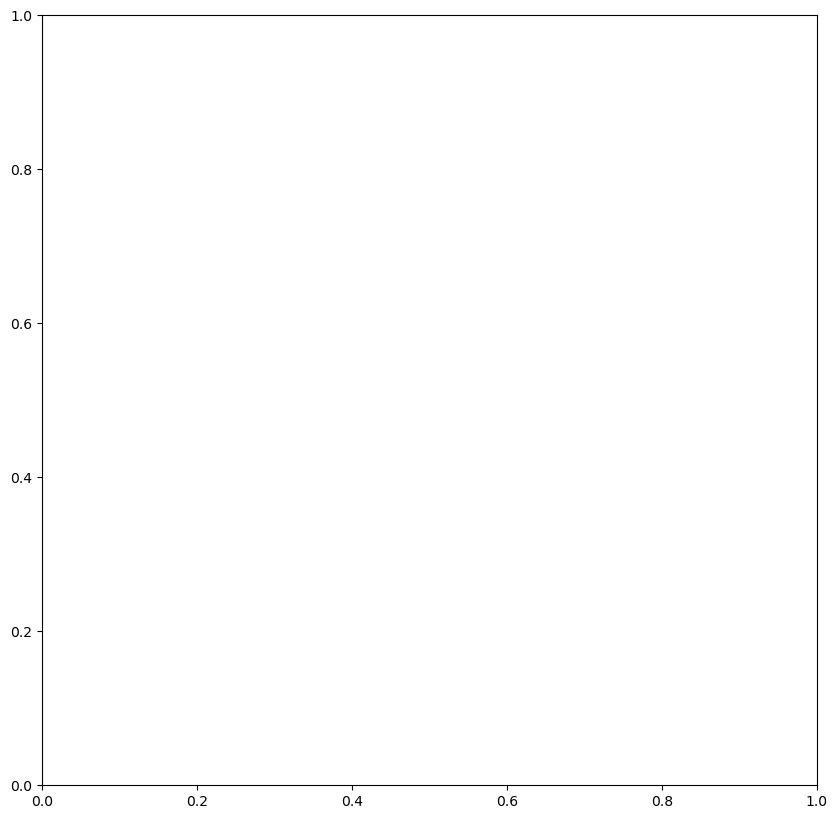

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(reduced_embeddings[:,0],reduced_embeddings[:,1],c=test_labels,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [ ]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=data['target'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

[[ 3.3993301  -0.55204433  1.9749936 ]
 [ 2.757258   -1.0175647  -0.06846315]
 [ 2.7773361  -0.969639    3.4391754 ]
 ...
 [ 4.416943   -1.8493332  -1.3753049 ]
 [ 4.487592    0.51753706 -2.575471  ]
 [ 2.5207891  -1.2784324  -2.3279417 ]]
